In [1]:
from basic import *
import tubemap
import matplotlib.pyplot as plt

In this notebook we perform the experiments which will be placed in our paper:
We perform experiments over all the following parameter values:

- Learning rate (alpha) = [0.7, 0.3]
- Gamma = [0.7, 0.3]
- Policy = [Epsilon-greedy, Boltzmann]


In [2]:
# Initial setup
def experiment(lr, gamma, policy):
    g = create_networkx_graph(tubemap.tubemap_dictionary)
    R = initialise_R(g, 6)
    scores, steps, Q = learn(R, learning_rate = lr, gamma = gamma, num_episodes = 2000, graph = g, policy = policy, parameter = .9, 
                      min_parameter = .05, start = 1, end = 6)
    return scores, steps, Q

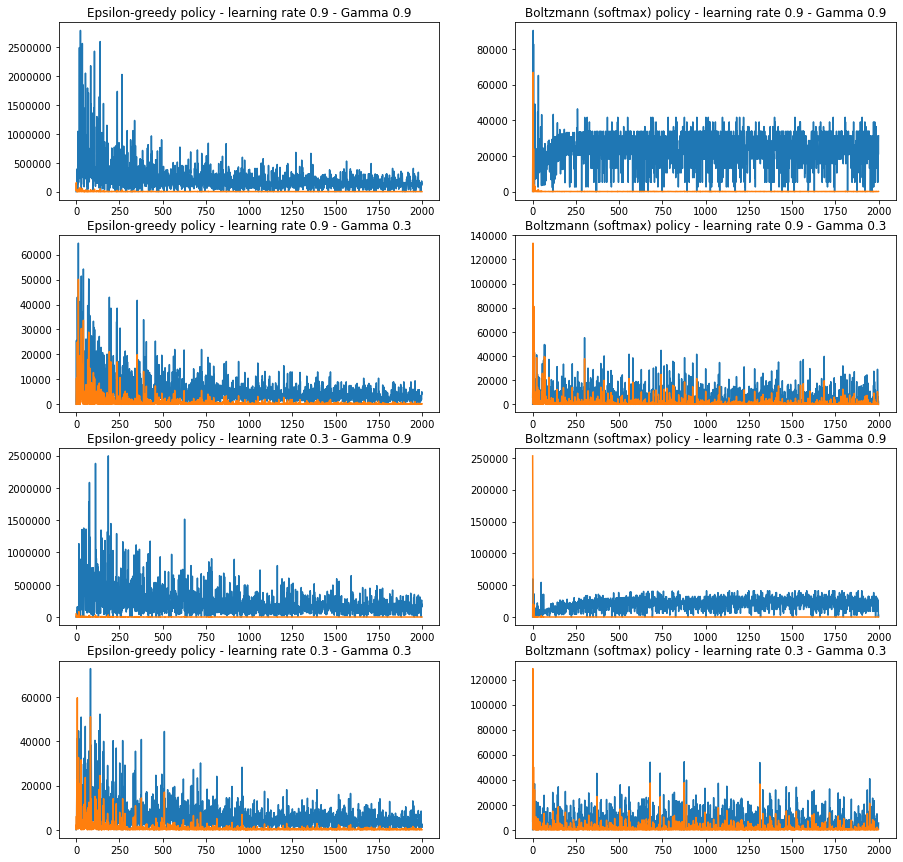

In [3]:
fig, axs = plt.subplots(4,2, figsize = (15,15))
results = {}
Qs = {}
steps = {}
score_steps = {}
for i, lr in enumerate([0.9,0.3]):
    for j, gamma in enumerate([0.9,0.3]):
        for k, policy in enumerate(['epsilon', 'boltzmann']):
            s, st, Q = experiment(lr, gamma, policy)
            results[f'{policy}_{gamma}_{lr}'] = s
            Qs[f'{policy}_{gamma}_{lr}'] = Q
            steps[f'{policy}_{gamma}_{lr}'] = st
            if i == 0 and j == 0:
                axs[0, k].plot(s)
                axs[0, k].plot(st)
                if k  == 0:
                    axs[0, k].set_title(f'Epsilon-greedy policy - learning rate {lr} - Gamma {gamma}')
                if k == 1:
                    axs[0, k].set_title(f'Boltzmann (softmax) policy - learning rate {lr} - Gamma {gamma}')
            if i == 0 and j ==  1:
                axs[1,k].plot(s)
                axs[1, k].plot(st)
                if k  == 0:
                    axs[1, k].set_title(f'Epsilon-greedy policy - learning rate {lr} - Gamma {gamma}')
                if k == 1:
                    axs[1, k].set_title(f'Boltzmann (softmax) policy - learning rate {lr} - Gamma {gamma}')
            if i == 1 and j == 0:
                axs[2, k].plot(s)
                axs[2, k].plot(st)
                if k == 0:
                    axs[2, k].set_title(f'Epsilon-greedy policy - learning rate {lr} - Gamma {gamma}')
                if k == 1:
                    axs[2, k].set_title(f'Boltzmann (softmax) policy - learning rate {lr} - Gamma {gamma}')
            if i == 1 and j == 1:
                axs[3, k].plot(s)
                axs[3, k].plot(st)
                if k  == 0:
                    axs[3, k].set_title(f'Epsilon-greedy policy - learning rate {lr} - Gamma {gamma}')
                if k == 1:
                    axs[3, k].set_title(f'Boltzmann (softmax) policy - learning rate {lr} - Gamma {gamma}')
